# Các thư viện

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.facecolor' : 'white'})

# Đọc dữ liệu

Dataset đã được download về và lưu trữ với đường dẫn: <span style="color: red;">./data/raw/daily_weather_data.csv</span>

In [2]:
weather_df = pd.read_csv('data/raw/daily_weather_data.csv')
weather_df

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0
...,...,...,...,...,...,...,...,...,...,...,...
324642,07-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,18.6,25.6,3.0,24.7,1013.7
324643,08-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,19.6,25.6,2.0,20.5,1013.0
324644,09-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,23.4,19.6,29.6,34.0,24.0,1015.4
324645,10-10-2022,Western Sahara,El Aaiún,27.125287,-13.162500,23.1,18.6,29.7,39.0,28.4,1017.6


# Hiểu dữ liệu

### Số dòng, số cột

In [3]:
num_rows, num_cols = weather_df.shape
print('Số dòng: {}\nSố cột: {}'.format(num_rows, num_cols))

Số dòng: 324647
Số cột: 11


### Ý nghĩa và kiểu dữ liệu của từng cột

In [4]:
weather_df.columns.tolist()

['date',
 'country',
 'city',
 'Latitude',
 'Longitude',
 'tavg',
 'tmin',
 'tmax',
 'wdir',
 'wspd',
 'pres']

|Tên cột|Ý nghĩa|Đơn vị|
|-|-|-|
|**date**|Ngày mà dữ liệu được ghi lại
|**country**| Tên quốc gia
|**city**| Tên thành phố
|**Latitude**| Vĩ độ của thành phố  
|**Longtitude**| Kinh độ của thành phố  
|**tavg**| Nhiệt độ trung bình| °C  
|**tmax**| Nhiệt độ cao nhất| °C  
|**tmin**| Nhiệt độ thấp nhất| °C  
|**wdir**| Hướng gió trung bình| độ (°)  
|**wspd**| Tốc độ gió trung bình|km/h  
|**pres**| Áp suất không khí mực nước biển|hPa

In [5]:
weather_df.dtypes

date          object
country       object
city          object
Latitude     float64
Longitude    float64
tavg         float64
tmin         float64
tmax         float64
wdir         float64
wspd         float64
pres         float64
dtype: object

Kiểu dữ liệu của từng cột trong dataframe: 
- 3 cột đầu là kiểu categorical, 
- Các cột còn lại kiểu numeric.

### Bảng thông số thống kê bản của các cột dữ liệu numeric

In [6]:
weather_df[['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres']].describe().drop(index = ['count', 'std']).round(2)

,tavg,tmin,tmax,wdir,wspd,pres
mean,21.02,17.4,25.04,163.81,13.32,1013.28
min,-33.80,-39.3,-27.30,0.00,0.00,860.20
25%,15.60,11.3,19.80,81.00,8.10,1009.90
50%,25.00,21.3,28.60,142.00,11.60,1012.90
75%,27.50,24.5,31.20,251.00,16.90,1016.80
max,44.10,38.5,89.60,360.00,105.50,1058.00


### Bảng thông số thông kê cơ bản của các cột dữ liệu categorical

In [24]:
weather_df[['city', 'country']].describe()

,city,country
count,324647,324647
unique,192,194
top,Kingston,Jamaica
freq,3490,1745


* Có 194 nước và 192 thành phố khác nhau.
* Quốc gia và thành phố có nhiều dòng dữ liệu nhất thuộc về Macau và Kingston, với lần lượt là 3490 và 1745 dòng.

##### Liệu thành phố và quốc gia được thu thập nhiều nhất là các quốc gia trên?

In [34]:
print(weather_df['city'].value_counts()[:5])
print()
print(weather_df['country'].value_counts()[:5])

Kingston      3490
London        1745
Victoria      1745
San Juan      1745
Basseterre    1745
Name: city, dtype: int64

Jamaica    1745
Vanuatu    1745
India      1745
Tonga      1745
Bahrain    1745
Name: country, dtype: int64


- Thành phố được thu thập nhiều nhất là __Kingston__
- Quốc gia được thu thập nhiều nhất có hơn 1 giá trị

### Giá trị thiếu (chỉ xét các cột bị thiếu)

In [14]:
def missing_ratio(s):
  '''
    input: the column of the dataframe or a series object
    output: the missing values ratio of the input column in percentage from 0 to 100
    calculating the missing values ratio of a column
  '''
  return s.isna().mean()*100

missing_ratio_df = weather_df.agg(missing_ratio).round(3).to_frame(name = 'missing ratio')
missing_ratio_df = missing_ratio_df[missing_ratio_df["missing ratio"] != 0]#Remove non-missing columns
missing_ratio_df.sort_values(by = 'missing ratio', ascending = False)

,missing ratio
wdir,12.540
pres,10.852
wspd,6.853
tmax,3.813
tmin,3.808
tavg,2.983


6 cột bị thiếu dữ liệu, trong đó 3 cột __wdir__, __pres__, __wspd__ có tỉ lệ thiếu hơn 5%. 

### Các dòng trùng

In [9]:
rows_dup_count = weather_df.duplicated().sum()
print('Số dòng bị trùng: {}'.format(rows_dup_count))

Số dòng bị trùng: 0


### Tính phân bố của dữ liệu (numeric)

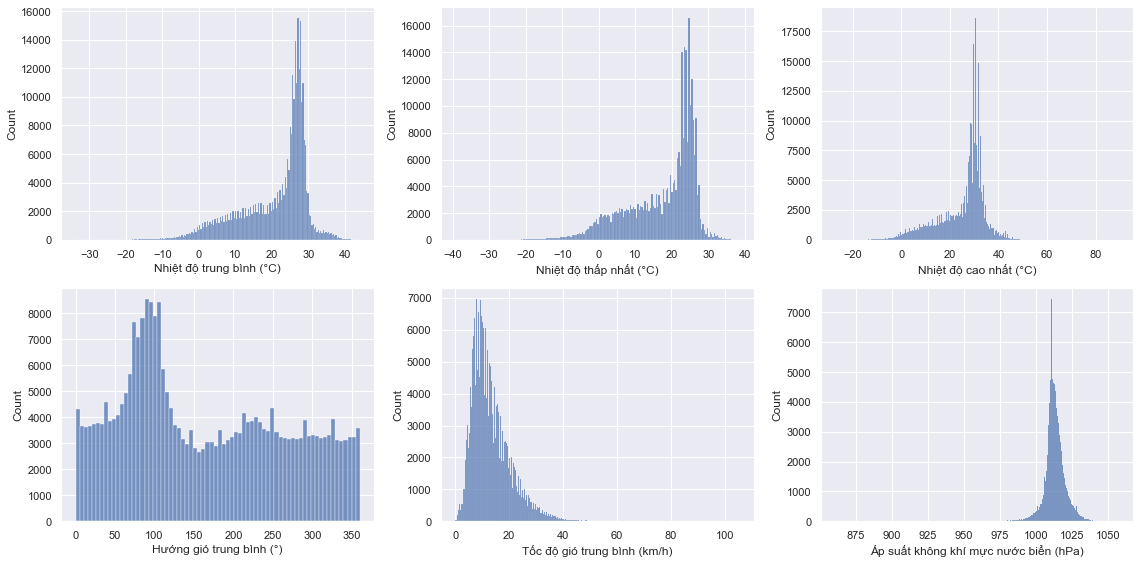

In [16]:
numeric_df = weather_df[['tavg', 'tmin', 'tmax', 'wdir', 'wspd', 'pres']]
col_describe = {
  'tavg' : 'Nhiệt độ trung bình (°C)', 'tmin' : 'Nhiệt độ thấp nhất (°C)',
  'tmax' : 'Nhiệt độ cao nhất (°C)', 'wdir' : 'Hướng gió trung bình (°)',
  'wspd' : 'Tốc độ gió trung bình (km/h)', 'pres' : 'Áp suất không khí mực nước biển (hPa)'
  }
cols = list(col_describe.keys())
fig, axes = plt.subplots(2,3, figsize = (16,8))
for i,ax in enumerate(axes.flat):
  sns.histplot(data = numeric_df, x = cols[i], ax = ax)
  ax.set_xlabel(col_describe[cols[i]])
fig.tight_layout()